In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')
os.chdir('/home/seidi/Repositories/mestrado_final/')

## Aparentemente todos os métodos de feature selection se saíram bem

                              mean       std       min       max
feature_selection_method                                        
pca                       0.888246  0.059199  0.833829  0.992591
pearson                   0.941294  0.056078  0.829888  0.992549
rf                        0.932955  0.072717  0.825867  0.992549


<AxesSubplot:xlabel='method', ylabel='r2'>

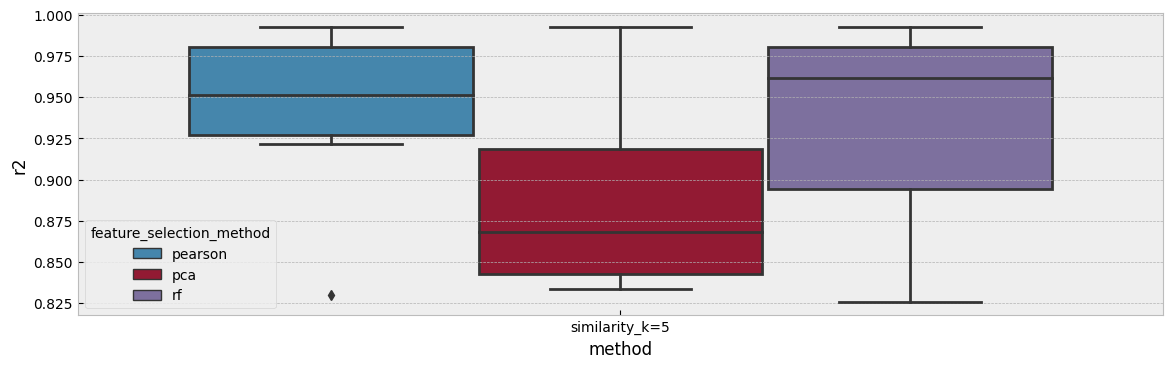

In [10]:
scores = pd.read_csv('results/similarity_scores.csv')
print(scores.groupby('feature_selection_method').r2.describe()[['mean', 'std', 'min', 'max']])
plt.figure(figsize=(14,4), dpi=100)
sns.boxplot(x='method', y='r2', hue='feature_selection_method', data=scores)

## Apenas features extraídas através da RF importance tiveram boa performances na clusterização

In [3]:
scores = pd.read_csv('data/results/clustering/clustering_scores.csv')
scores.groupby(['feature_selection_method', 'method']).r2.describe()[['mean', 'std', 'min', 'max']]
scores[scores.feature_selection_method == 'rf'].method.unique()

array(['clustering_eps=0.3', 'clustering_eps=0.28031161373808716',
       'clustering_eps=0.3354115266123573',
       'clustering_eps=0.2740634578923894'], dtype=object)

In [4]:
scores = pd.read_csv('data/results/clustering/clustering_scores.csv')
scores.groupby(['feature_selection_method', 'method']).r2.describe()[['mean', 'std', 'min', 'max']]
scores[(scores.method.isin(['clustering_eps=0.3', 'clustering_eps=0.37777777777777777', 'clustering_eps=0.45555555555555555', 'clustering_eps=0.5333333333333333', 'clustering_eps=0.6111111111111112'])) & (scores.feature_selection_method == 'rf')][['base', 'r2', 'method']]
# scores[~scores.pca.isna()].groupby(['feature_selection_method', 'pca', 'method']).r2.describe()[['mean', 'std', 'min', 'max']]

,base,r2,method
28,texture_67940,0.996233,clustering_eps=0.3
32,sift_999900,0.933390,clustering_eps=0.3
36,moments_67940,0.987293,clustering_eps=0.3
40,mnist121d_69900,0.956236,clustering_eps=0.3
44,fashion_69900,0.932971,clustering_eps=0.3
48,colorHisto_67940,0.989837,clustering_eps=0.3
52,mnist_69900,0.945131,clustering_eps=0.3


In [4]:
import pandas as pd
df = pd.read_csv('src/notebooks/2020.12.07/cluster_size.csv')
df.head()
df[(df.method=='rf') & (df.eps > 0.35) & (df.eps < 0.4)]

,cluster_size,n_clusters,base,method,eps
137,2,50,texture_67940,rf,0.377778
147,8,49,sift_999900,rf,0.377778
157,2,50,moments_67940,rf,0.377778
167,3,49,mnist121d_69900,rf,0.377778
177,4,49,fashion_69900,rf,0.377778
187,2,50,colorHisto_67940,rf,0.377778
196,3,47,mnist_69900,rf,0.377778


In [17]:
res = pd.read_csv('/home/seidi/Repositories/prox_graph_auto_config/results/csv/single_target/scores_all_datasets.csv')
res_new = pd.read_csv('/home/seidi/Repositories/prox_graph_auto_config/results/csv/single_target/scores_all_datasets_new_mfs.csv')
res_newmf_newds = pd.read_csv('/home/seidi/Repositories/prox_graph_auto_config/src/notebooks/2020.11.03/results/scores/gmm_scores_original.csv')

res = res[(res.approach == 'gmm') & (res.model.str.startswith('RandomForest'))]
res['approach'] = 'old'
res_new['approach'] = 'new_mfs'
res_newmf_newds['approach'] = 'new_mfs+new_ds'
res_newmf_newds = res_newmf_newds[~res_newmf_newds.base.isin(['fashion', 'mnist121d'])]
all_res = pd.concat([res, res_new, res_newmf_newds])

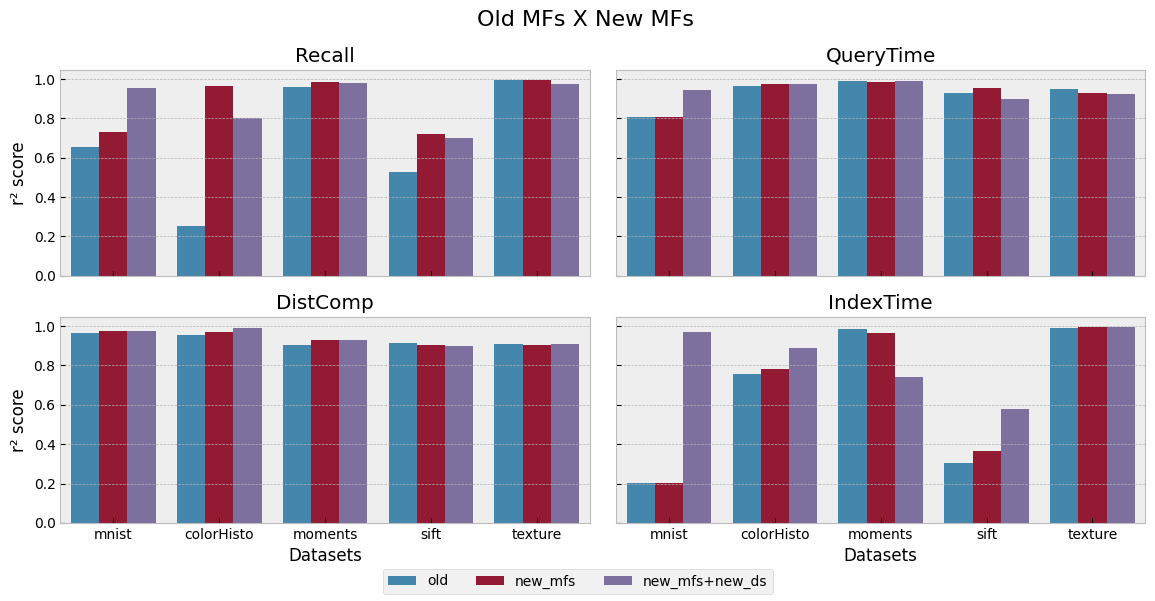

In [19]:
fig, axes = plt.subplots(2,2,figsize=(14,6), dpi=100, sharex=True, sharey=True)
axes = iter(axes.reshape(-1))
fig.suptitle('Assessing metabase enhancement', fontsize=16)

l_gambeta = []
for t in all_res.target.unique():
    ax = next(axes)
    l_gambeta.append(ax)
    ax.set_title(t)
    sns.barplot(x='base', y='r2', hue='approach', ax=ax, data=all_res[all_res.target==t])
    ax.get_legend().remove()

l_gambeta = np.array(l_gambeta).reshape(2,2)
plt.setp(l_gambeta[-1, :], xlabel='Datasets')
plt.setp(l_gambeta[:, 0], ylabel='r² score')
plt.setp(l_gambeta[:-1, :], xlabel='')
plt.setp(l_gambeta[:, 1:], ylabel='')

plt.subplots_adjust(wspace=0.05, hspace=0.2)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

<AxesSubplot:xlabel='target', ylabel='r2'>

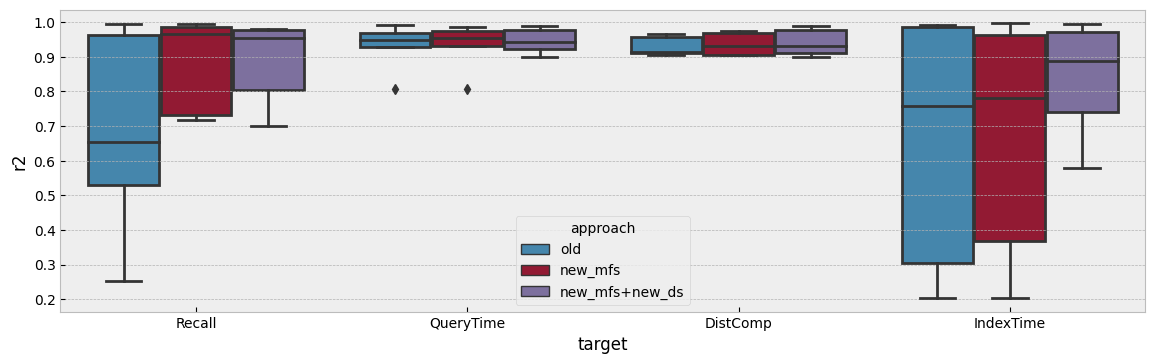

In [23]:
plt.figure(figsize=(14,4), dpi=100)
sns.boxplot(x='target', y='r2', hue='approach', data=all_res)

## Cluster sizes

Text(0.5, 0.98, 'Distribuição dos tamanhos dos clusters de cada dataset de treino por método')

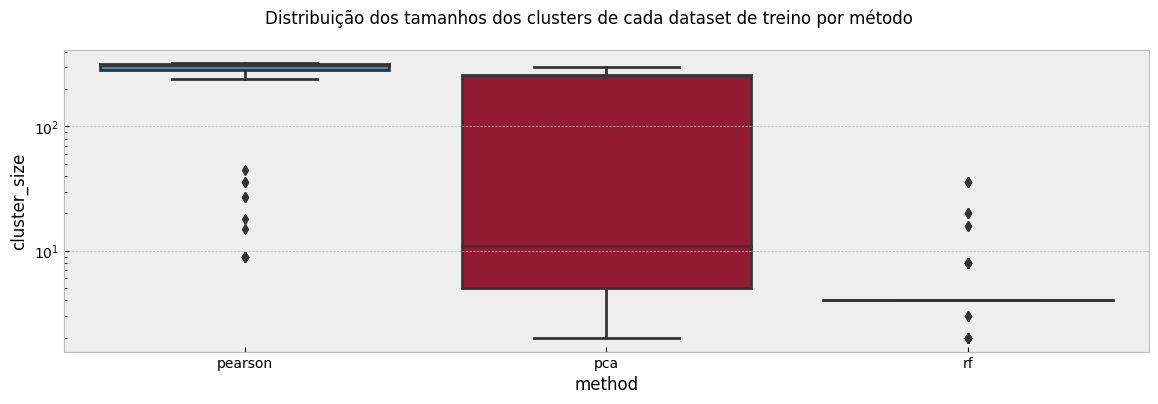

In [8]:
plt.figure(figsize=(14,4), dpi=100)
sizes = pd.read_csv('src/notebooks/2020.12.07/cluster_size.csv')
sns.boxplot(x='method', y='cluster_size', data=sizes)
plt.yscale('log')
plt.suptitle('Distribuição dos tamanhos dos clusters de cada dataset de treino por método')


<AxesSubplot:xlabel='eps', ylabel='cluster_size'>

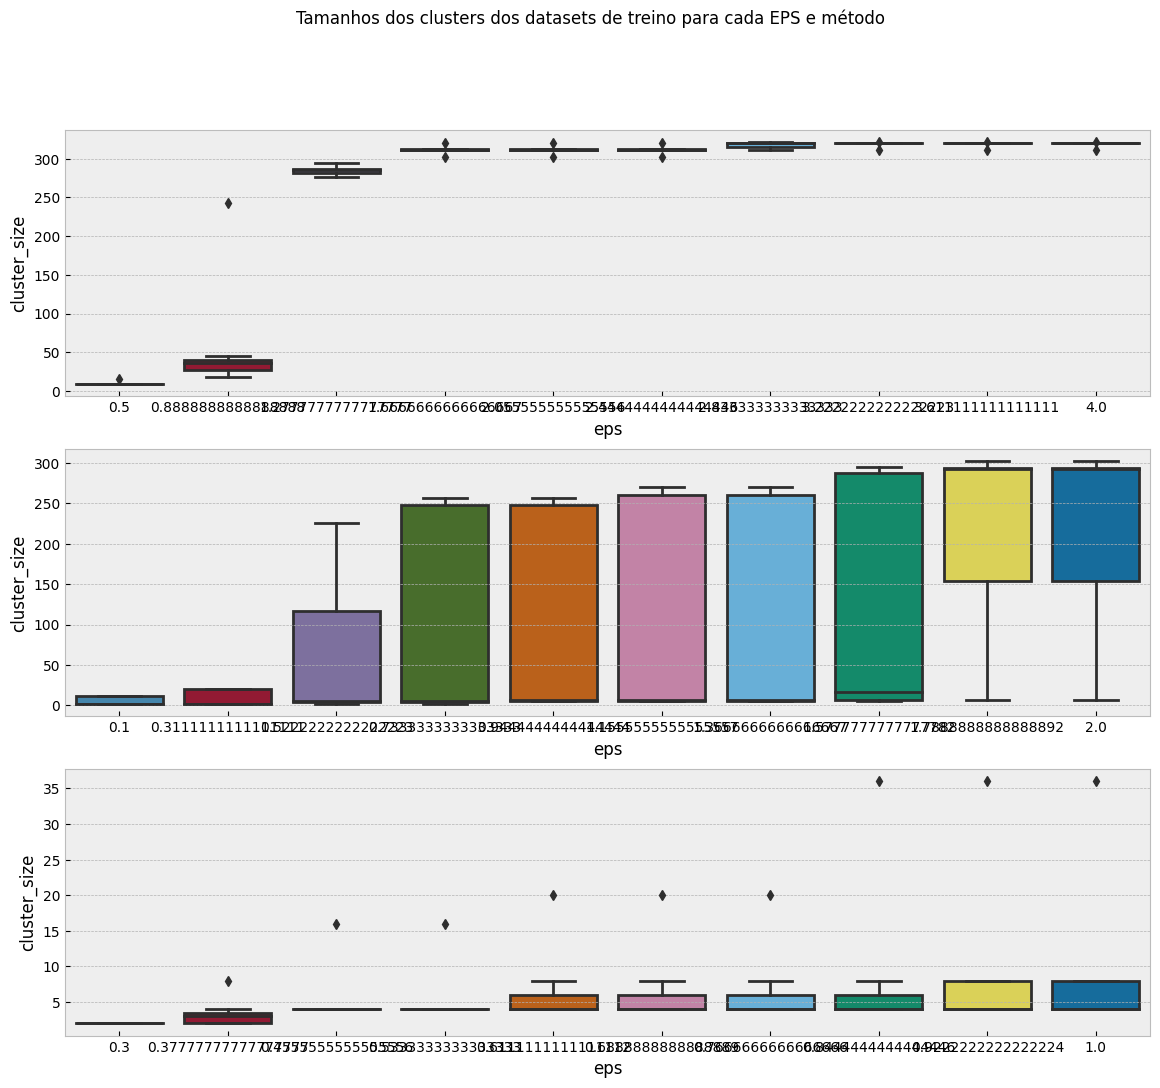

In [7]:
fig, axes = plt.subplots(3,1,figsize=(14,12), dpi=100)

plt.suptitle('Tamanhos dos clusters dos datasets de treino para cada EPS e método')
sns.boxplot(x='eps', y='cluster_size',data=sizes[sizes.method=='pearson'], ax=axes[0])
sns.boxplot(x='eps', y='cluster_size',data=sizes[sizes.method=='pca'], ax=axes[1])
sns.boxplot(x='eps', y='cluster_size',data=sizes[sizes.method=='rf'], ax=axes[2])
# plt.yscale('log')


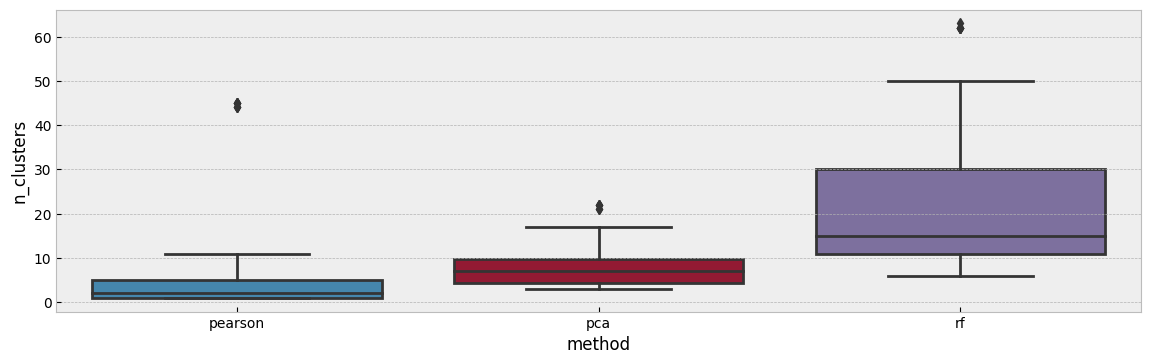

In [5]:
plt.figure(figsize=(14,4), dpi=100)
sns.boxplot(x='method', y='n_clusters', data=sizes)
# plt.yscale('log')
plt.show()

<AxesSubplot:xlabel='eps', ylabel='n_clusters'>

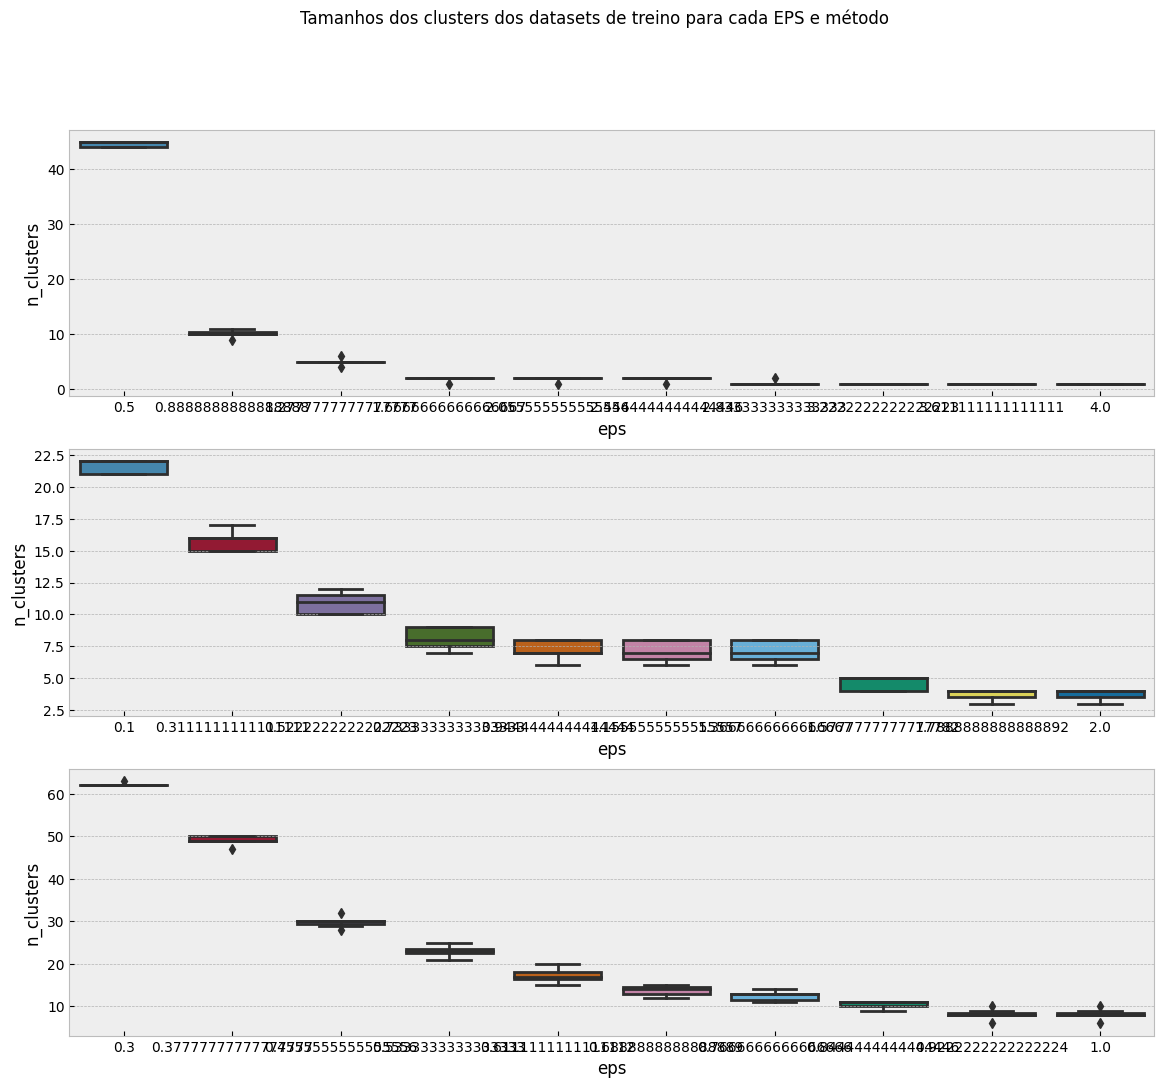

In [9]:
fig, axes = plt.subplots(3,1,figsize=(14,12), dpi=100)

plt.suptitle('Tamanhos dos clusters dos datasets de treino para cada EPS e método')
sns.boxplot(x='eps', y='n_clusters',data=sizes[sizes.method=='pearson'], ax=axes[0])
sns.boxplot(x='eps', y='n_clusters',data=sizes[sizes.method=='pca'], ax=axes[1])
sns.boxplot(x='eps', y='n_clusters',data=sizes[sizes.method=='rf'], ax=axes[2])
# plt.yscale('log')
